## Exploring Pytorch and JAX

Cite like this [[1](#ref-1)]. In this post, we hope to concisely introduce two prominent frameworks for deep learning: Pytorch and JAX. 

We also hoped to cover Tensorflow. But for reasons unclear to us, we were unable to install Tensorflow both with Python 3.12 and Python 3.11. Given the simultaneous development of Tensorflow and JAX within Google, and the recent popularity of JAX, I wouldn't be surprised if Tensorflow is heading towards deprecation in the future. For completeness, it is worth noting that Tensorflow is the oldest among the three, being first introduced in 2011.

Pytorch was first introduced in 2016 by Adam Paszke and Soumith Chintala along with others at FAIR [[1](#ref-1)]. Some features that made Pytorch stand out over Tensorflow when it was introduced are: dynamic computational graph, pythonic nature, and extensive ecosystem - notably torchvision, torchaudio, and torchtext.

JAX ("just after execution") was first introduced in 2018 by Roy Frostig, Matthew James Johnson, and Chris Leary at Google Brain [[2](#ref-2)]. Some unique features of JAX include: jit compilation ("just in time compilation"), XLA ("accelerated linear algebra"), autovectorization & large data parallelism (via `vmap` and `pmap` respectively). JAX is known for its computational efficiency on hardware accelerators like GPUs and TPUs. 

What both Pytorch and JAX have in common is automatic differentiation (`autograd` in pytorch, and just `grad` in JAX). The execution speed however is faster in JAX since it benefits from autovectorization and jit compilation abilities mentioned earlier. On the other hand, what makes Pytorch and JAX fundamentally different as frameworks is the programming paradigm they use: Pytorch is object-oriented, while JAX is functional.

Let us look at some examples. 




<!-- ### PyTorch
Developed by FAIR, PyTorch is celebrated for its ease of use, flexibility, and dynamic computation graph. It allows for intuitive model development and debugging, making it a favorite among researchers and developers for prototyping and experimentation.
**Unique Features:**
- **Dynamic Computation Graph:** PyTorch constructs the computation graph on-the-fly. This feature, known as eager execution, allows for more interactive and dynamic model development [14].
- **Pythonic Nature:** PyTorch's design is highly pythonic, making it easy to learn and use, especially for those already familiar with Python [14].
- **Extensive Ecosystem:** With libraries like torchvision, torchaudio, and torchtext, PyTorch provides a rich ecosystem for various applications, from computer vision to natural language processing [14].
### JAX
JAX, developed by Google, is a framework that extends NumPy with automatic differentiation and GPU/TPU acceleration. It is particularly suited for high-performance machine learning research and scientific computing.
**Unique Features:**
- **Functional Programming Style:** JAX encourages pure functions and immutability, aligning with functional programming principles. This approach can simplify certain types of mathematical modeling and transformation composition [12][13]. -->
<!-- - **Composable Transformations:** JAX provides powerful function transformations like `grad`, `jit`, and `vmap` for differentiation, just-in-time compilation, and vectorization, respectively [12][13].
- **Performance:** Leveraging XLA (Accelerated Linear Algebra) for compiling and optimizing computations, JAX can achieve significant performance improvements, especially on accelerators like GPUs and TPUs [13][18].
## Summary Comparison
- **Ease of Use:** PyTorch is often praised for its intuitive and pythonic API, making it easier for beginners and for rapid prototyping. JAX, with its functional programming model, might have a steeper learning curve but offers powerful capabilities for those familiar with its paradigm [14][18].
- **Performance:** JAX is designed for high-performance computing, leveraging JIT compilation and XLA. PyTorch also offers performance optimizations but might not match JAX's speed in certain scenarios, especially on TPUs [13][18].
- **Ecosystem and Community:** PyTorch benefits from a larger community and a more extensive ecosystem of libraries and tools. JAX, while having a smaller ecosystem, is rapidly growing and includes specialized libraries like Flax and Haiku for neural network development [14][18].
In conclusion, the choice between PyTorch and JAX is a trade-off between versatility and performance optimization. PyTorch is considered more accessible and versatile for a wide range of applications, while JAX is well-known for its performance optimization and functional programming features - suitable for large-scale ML and scientific computing in particular [][] -->


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Define a simple neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()

# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Load the dataset
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

# Create the DataLoader
trainloader = DataLoader(training_data, batch_size=64, shuffle=True)

# Train the network
for epoch in range(2):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

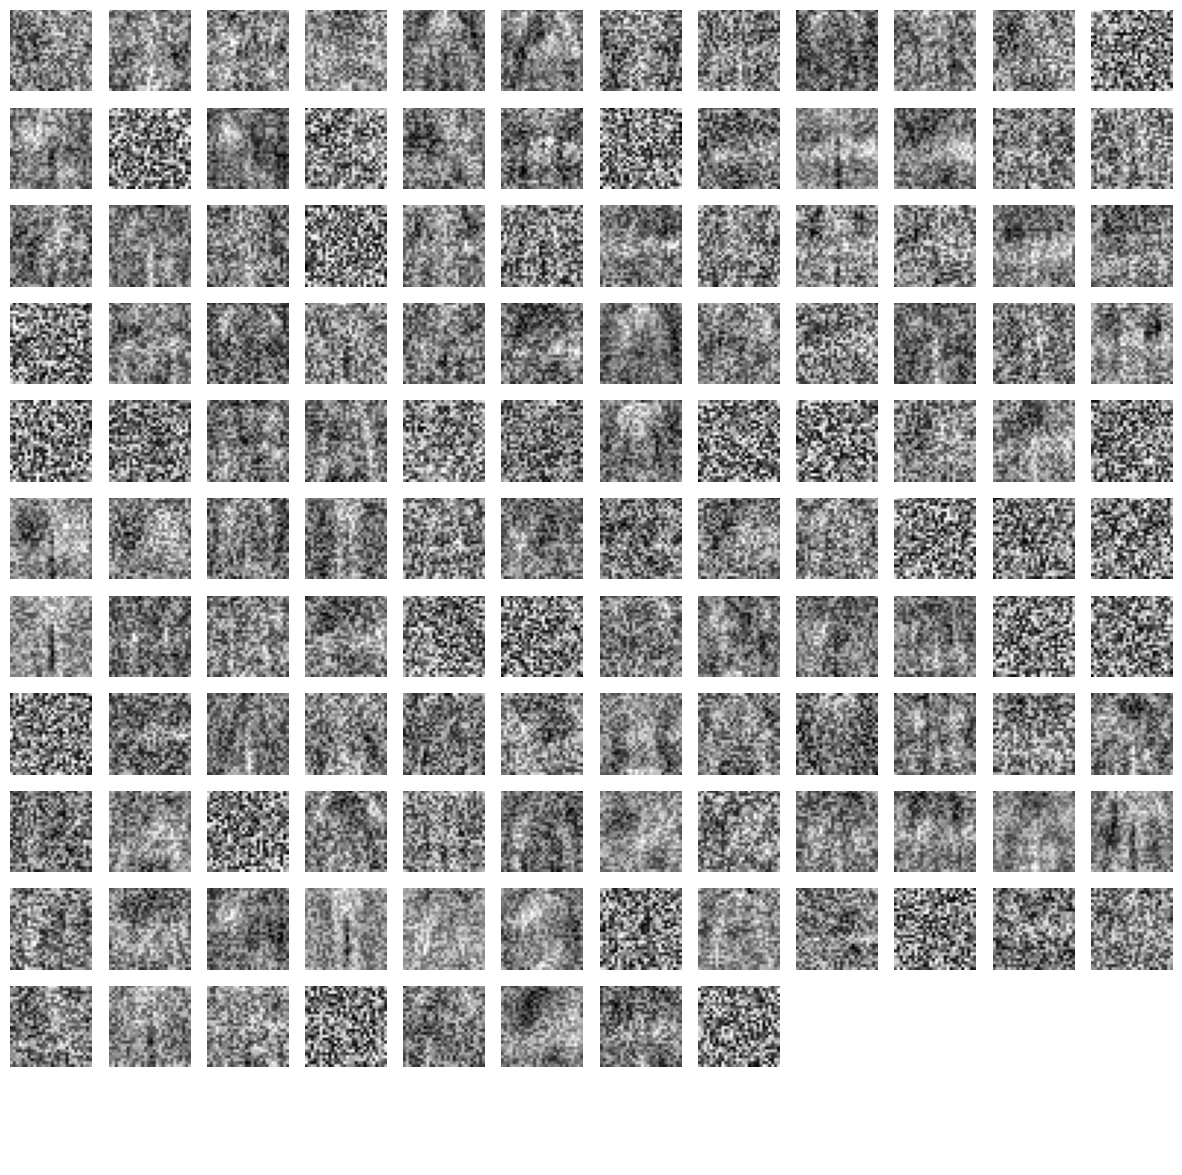

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# Assuming 'net' is your trained PyTorch model and 'fc1' is the first fully connected layer
weights = net.fc1.weight.data.numpy()

# Number of plots along x and y axes
num_x = int(np.ceil(np.sqrt(len(weights))))
num_y = num_x

fig, axes = plt.subplots(num_x, num_y, figsize=(15, 15))
for i, ax in enumerate(axes.flat):
    if i < len(weights):
        ax.imshow(weights[i].reshape(28, 28), cmap='gray')  # Assuming input images are 28x28
    ax.axis('off')
plt.show()

Above is a matplotlib visualization of the trained weight matrix for the first fully connected layer (with 128 neurons, each getting 784 = 28*28 weights, visualized as grayscale images)

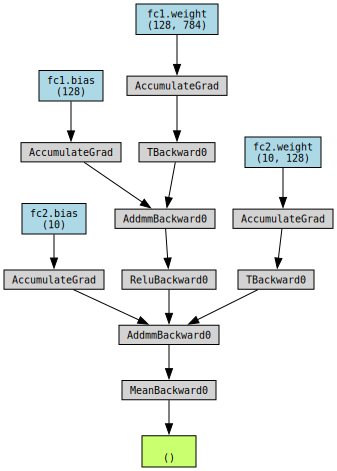

In [11]:
from torchviz import make_dot

# Create a dummy input tensor that matches the input shape of the network
dummy_input = torch.randn(1, 784)

# Perform a forward pass to get the output
output = net(dummy_input)

# Visualize the computational graph
graph = make_dot(output.mean(), params=dict(net.named_parameters()))
graph.render('network_graph', format='png')  # This will save the graph as a PNG image
graph

Above is a torchviz visualization of the neural net flow : two fully connected layers fc1 and fc2, fc1 has 128 neurons each with 784 weights, and fc2 has 10 neurons each with 128 weights. each input is a 28*28 image.

### References  
[1] <a id="ref-1"></a> [https://proceedings.neurips.cc/paper_files/paper/2019/file/bdbca288fee7f92f2bfa9f7012727740-Paper.pdf](https://proceedings.neurips.cc/paper_files/paper/2019/file/bdbca288fee7f92f2bfa9f7012727740-Paper.pdf)  
[2] <a id="ref-2"></a> [https://mlsys.org/Conferences/doc/2018/146.pdf](https://mlsys.org/Conferences/doc/2018/146.pdf)  
[3] <a id="ref-3"></a> []()  
[4] <a id="ref-4"></a> []()  
[5] <a id="ref-5"></a> []()  
<!-- use two extra spaces at end of each line for line break -->
